# Training Models

Having  a  good  understanding  of  how  things  work  can  help  you  quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what’s under the hood will also help you debug issues and perform error analysis more efficiently.

We  will  start  by  looking  at  the  Linear  Regression  model,  one  of  the simplest models there is. We will discuss **two very different ways to train it**:

- Using a **direct “closed-form” equation** that directly computes the model parameters  that  best  fit  the  model  to  the  training  set  (i.e.,  the  model  parameters  thatminimize the cost function over the training set)

- Using  an  **iterative  optimization  approach,  called  Gradient  Descent  (GD)**,  that gradually  tweaks  the  model  parameters  to  minimize  the  cost  function  over  the training  set,  eventually  converging  to  the  same  set  of  parameters  as  the  first method. We will look at a few variants of Gradient Descent: Batch GD, Mini-batch GD,and Stochastic GD.

Next we will look at Polynomial Regression, a more complex model that can fit non‐linear  datasets.  Since  this  model  has  more  parameters  than  Linear  Regression,  it  is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case, using learning curves, and then we will look at several regularization techniques that can reduce the risk of overfitting the training set.


Finally,  we  will  look  at  two  more  models  that  are  commonly  used  for  classification tasks: Logistic Regression and Softmax Regression.

## Linear Regression

A  linear  model  makes  a  prediction  by  simply  computing  **a  weighted sum of the input features**, plus **a constant called the _bias term_** (also called the _intercept term_)

Linear Regression model prediction:

\begin{equation*}
\hat{y} = 
\theta_0 + \theta_1x_1 + \theta_2x_2 +···+ \theta_nx_n 
\end{equation*}

- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $x_i$ is the $i^{th}$ feature value
- $\theta_j$ is the $j^{th}$ model  parameter  (including  the  _bias  term_ $\theta_0$ and  the  feature  weights $\theta_1, \theta_2,···,\theta_n$).

This can be written much more concisely using a vectorized form:

\begin{equation*}
\hat{y} = 
h_{\pmb{\theta}}(x) = 
\pmb{\theta·x}
\end{equation*}

- $\pmb{\theta}$ is  the  model’s  *parameter  vector*,  containing  the  bias  term $\theta_0$ and  the  feature weights $\theta_1$ to $\theta_n$. 
- $\pmb{x}$ is the instance’s *feature vector*, containing $x_0$ to $x_n$, whith $x_0$ always equal to 1.
- $\pmb{\theta·x}$ is  the  dot  product  of  the  vectors $\pmb{\theta}$ and $\pmb{x}$,  which  is  of  course  equal  to $\theta_0x_0 + \theta_1x_1 + \theta_2x_2 +···+ \theta_nx_n$.
- $h_{\pmb{\theta}}$ is the hypothesis function, using the model parameters $\pmb{\theta}$.

In Machine Learning, vectors are often represented as *column vectors*,  which  are  2D  arrays  with  a  single  column.  If $\pmb{\theta}$ and $\pmb{x}$  are  column  vectors,  then  the  prediction  is: $\hat{y} = \pmb{\theta^Tx}$ ,  where $\pmb{\theta^T}$ is  the *transpose* of $\pmb{\theta}$ (a row vector instead of a column vector) and $\pmb{\theta^Tx}$ is the matrix multiplication of $\pmb{\theta^T}$ and $\pmb{x}$. It is of course the same prediction,  except  it  is  now  represented  as  a  single  cell  matrix  rather than  a  scalar  value. We  will  use  this  notation  to  avoid switching between dot products and matrix multiplications.

Okay, that’s the Linear Regression model, so now how do we train it? Recall that **training a model means setting its parameters so that the model best fits the training set**.  For  this  purpose,  we  first  need  a  measure  of  how  well  (or  poorly)  the  model  fits the training data. we saw previously that the most common performance measure of a regression model is the **Root Mean Square Error (RMSE)**. 

Therefore, <u>to train a Linear Regression model, you need to **find** the value of $\pmb{\theta}$ that **minimizes**  the  **RMSE**</u>. 

In  practice,  it  is  simpler  to  minimize  the  Mean  Square  Error  (MSE) than  the  RMSE,  and  it  leads  to  the  **same  result**  (because  the  value  that  minimizes  a function also minimizes its square root. Remember that $RMSE = \sqrt{MSE}$). The MSE of a Linear Regression hypothesis $\pmb{h_\theta}$ on a training set $\pmb{X}$ is calculated using:

**MSE cost function for a Linear Regression model:**

\begin{equation*}
MSE(X, h_\theta) =
\frac{1}{m}
\sum_{i=1}^m(\theta^T·x^{(i)}-y^{(i)})^2
\end{equation*}

where $\hat{y}^{(i)} = \theta^T·x^{(i)} = \begin{bmatrix}\theta_0 & \theta_1 & · & · &\theta_n \end{bmatrix}·\begin{bmatrix}
x^{(i)}_0 = 1 \textrm{(always)} \\ x^{(i)}_1 \\·\\·\\ x^{(i)}_n\end{bmatrix}$  where $n$ is the number of features of the dataset and $j$ the number of the instance (row).

**REVISION**-----------------------------------------------------------------------------------------------------

Remember from before that:

The RMSE equation is:

\begin{equation*}
RMSE(X, h) =
\sqrt{\frac{1}{m}
\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2}
\end{equation*}

where $\hat{y}^i = h(x^{(i)}) = \textrm{Predicted Value}$       

and    

$\hat{y}^i - y^i = \textrm{Prediction Error}$


And:

<img src="pictures/pic12.png" alt="Alt text that describes the graphic" title="Notations" />

**END OF REVISION**----------------------------------------------------------------------------------------------

Most  of  these  notations  were  presented  before (see “Notations” in the Revision area). The only difference is that we write $\pmb{h_\theta}$ instead of just $\pmb{h}$ in order to make it clear that the  model  is  parametrized  by  the  vector $\pmb{\theta}$.  To  simplify  notations,  we  will  just  write $\pmb{MSE(\theta)}$ instead of $\pmb{MSE(X, h_\theta)}$.

## The Normal Equation

To **find the value of θ that minimizes the cost function**, there is a **closed-form solution** — in other words, a mathematical equation that **gives the result directly**. This is called the **Normal Equation**:

\begin{equation*}
\hat{\theta} = 
(X^T·X)^{-1}·X^T·y
\end{equation*}


In more detail:


\begin{equation*}
\hat{\theta} = 
\left(\begin{bmatrix}
(x^{(1)})^T \\ 
(x^{(2)})^T  \\
·\\
·\\ 
(x^{(m)})^T
\end{bmatrix}^T·
\begin{bmatrix}
(x^{(1)})^T \\ 
(x^{(2)})^T  \\
·\\
·\\ 
(x^{(m)})^T
\end{bmatrix} \right)^{-1}·
\begin{bmatrix}
(x^{(1)})^T \\ 
(x^{(2)})^T  \\
·\\
·\\ 
(x^{(m)})^T
\end{bmatrix}^T·
\begin{bmatrix}
(y^{(1)})& 
(y^{(2)})&
· & 
· &
(y^{(m)})
\end{bmatrix}
\end{equation*}

Which equals to:


\begin{equation*}
\hat{\theta} = 
\left(\begin{bmatrix}
x^{(1)}_0 &
x^{(2)}_0  &
· &
x^{(m)}_0 \\
x^{(1)}_1 &
x^{(2)}_1  &
· &
x^{(m)}_1 \\
x^{(1)}_2 &
x^{(2)}_2  &
· &
x^{(m)}_2 \\
· &
· &
· &
. \\
x^{(1)}_n &
x^{(2)}_n  &
· &
x^{(m)}_n
\end{bmatrix}·
\begin{bmatrix}
x^{(1)}_0 &
x^{(1)}_1 &
x^{(1)}_2  &
· &
x^{(1)}_n \\
x^{(2)}_0 &
x^{(2)}_1 &
x^{(2)}_2  &
· &
x^{(2)}_n \\
· &
· &
· &
. \\
x^{(m)}_0 &
x^{(m)}_1 &
x^{(m)}_2  &
· &
x^{(m)}_n
\end{bmatrix} \right)^{-1} ·
\begin{bmatrix}
x^{(1)}_0 &
x^{(2)}_0  &
· &
x^{(m)}_0 \\
x^{(1)}_1 &
x^{(2)}_1  &
· &
x^{(m)}_1 \\
x^{(1)}_2 &
x^{(2)}_2  &
· &
x^{(m)}_2 \\
· &
· &
· &
. \\
x^{(1)}_n &
x^{(2)}_n  &
· &
x^{(m)}_n
\end{bmatrix} ·
\begin{bmatrix}
(y^{(1)})& 
(y^{(2)})&
· & 
· &
(y^{(m)})
\end{bmatrix}
\end{equation*}


Finally:


\begin{equation*}
\hat{\theta} = 
\begin{bmatrix}
\theta_0 &
\theta_1  &
· &
· &
\theta_n 
\end{bmatrix}
\end{equation*}

Where:


- $\hat{\theta}$ are the weights that **minimize the cost function**. (Which means that minimize the **MSE/RMSE**, which means that minimizes the **standard deviation of the errors**)


- $X$ is a matrix containing the features values (excluding labels $y$) plus a column $x_0 = 1$ in order to procuce *the bias term* $\theta_0$


- $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.


- $m$ is the number of instances (rows)


- $n$ is the number of fetures (columns)

Let's generate some **linear-looking** data to test the previous equation on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Lets plot the data:

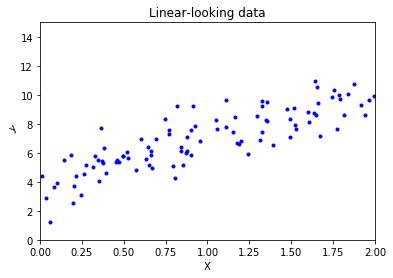

In [3]:
plt.plot(X, y,"b.", label="Linear-looking data")
plt.xlabel("X")
plt.ylabel("y", rotation="45")
plt.title("Linear-looking data")
plt.axis([0, 2, 0, 15])
plt.show()

Now let’s compute $\pmb{\hat{\theta}}$ using the **Normal Equation**. We will use the _inv()_ function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the _dot()_ method for matrix multiplication:

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

Where:
- theta_best is $\begin{equation*}
\hat{\theta} = 
(X^T·X)^{-1}·X^T·y
\end{equation*}$. **theta_best** in this case will be an array that will give us the optimal $\theta_0$ and $\theta_1$

- $X$ is a matrix containing the feature values (excluding labels $y$) plus a column $x_0 = 1$

- y is $y$

The actual function that we used to generate the data is $y = 4 +3x_0 + Gaussian$  $Noise$ .Les see what optimal theta the equation fund:

In [5]:
theta_best

array([[3.97893839],
       [3.06255577]])

In [46]:
from IPython.display import Markdown as md
md(f"We would have hoped for $𝜃_0 = 4$ and $𝜃_1 = 3$ instead of $𝜃_0 = {theta_best[0][0]}$ and $𝜃_1 = {theta_best[1][0]}$. Close enough, but the **noise** made it impossible to recover the exact paramenters of the original function.")

We would have hoped for $𝜃_0 = 4$ and $𝜃_1 = 3$ instead of $𝜃_0 = 3.9789383887359193$ and $𝜃_1 = 3.0625557678955513$. Close enough, but the **noise** made it impossible to recover the exact paramenters of the original function.

**Now you can make predictions using $\hat{\theta}$:**

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.97893839],
       [10.10404992]])

Let's plot the models predictions:

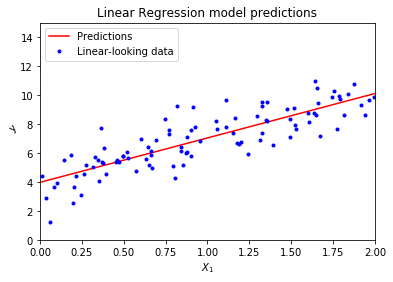

In [8]:
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X, y, "b.", label="Linear-looking data")
plt.xlabel("$X_1$")
plt.ylabel("y", rotation="45")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.title("Linear Regression model predictions")
plt.show()

**The equivalent code using Scikit-Learn looks like this:** 

(Note that sklearn separates the bias term (*intercept_* or $\theta_0$) from the feature weights (*coef_* or $\theta_j$))

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97893839]), array([[3.06255577]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.97893839],
       [10.10404992]])

**Other ways:**

The  LinearRegression  class  is  based  on  the  _scipy.linalg.lstsq()_  function  (the name stands for “least squares”), which you could call directly:

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97893839],
       [3.06255577]])

This function computes $\pmb{\theta = X^{+}y}$, where $\pmb{X^{+}}$ is the _pseudoinverse_ of $\pmb{X}$ (specifically the **Moore-Penrose  inverse**).  You  can  use  _np.linalg.pinv()_  to  compute  the  pseudoinverse directly:

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[3.97893839],
       [3.06255577]])

The pseudoinverse itself is computed using a standard matrix factorization technique called  **Singular  Value  Decomposition  (SVD)**  that  can  decompose  the  training  set matrix   $\pmb{X}$   into   the   matrix   multiplication   of   three   matrices  $\pmb{U}$ $\pmb{\Sigma}$ $\pmb{V^T}$ (see _numpy.linalg.svd())_.  The  pseudoinverse  is  computed  as $\pmb{X^{+} = V \Sigma^{+} U^T}$ .  To  compute the  matrix $\pmb{\Sigma^{+}}$,  the  algorithm  takes  $\pmb{\Sigma}$  and  sets  to  zero  all  values  smaller  than  a  tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix. 


**This approach is more efficient than computing the Normal Equation**, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $\pmb{X^T X}$ is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is **always defined**.

## Computational Complexity

The  Normal  Equation  computes  the  inverse  of  $\pmb{X^T X}$,  which  is  an  $(n  +  1)  \times  (n  +  1)$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$ (depending on the implementation).In other words, if you double the number of features, you multiply the computationtime by roughly $2^{2.4} = 5.3$ to $2^3 = 8$. The  SVD  approach  used  by  Scikit-Learn’s  LinearRegression  class  is  about  $O(n^2)$.  If you double the number of features, you **multiply the computation time by roughly 4**.


*Both  the  Normal  Equation  and  the  SVD  approach  **get  very  slow when  the  number  of  features  grows  large**  (e.g.,  100,000).  On  the positive side, both are linear with regards to the number of instances in the training set (they are $O(n)$), so they handle large training sets efficiently, __provided they can fit in memory__.*

Also, once you have trained your Linear Regression model (using the Normal Equa‐tion or any other algorithm), **predictions are very fast**: the computational complexity is **linear** with regards to both the number of instances you want to make predictionson and the number of features. **In other words, making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time**.





Now  we  will  look  at  very  different  ways  to  train  a  Linear  Regression  model,  **better suited  for  cases  where  there  are  a  large  number  of  features,  or  too  many  training instances to fit in memory**.

# Gradient Descent

*Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions  to  a  wide  range  of  problems.  The  general  idea  of  Gradient  Descent  is  to **tweak parameters** iteratively in order to **minimize a cost function**.

Concretely, you start by filling $\pmb{\theta}$ with random values (**this is called random initialization**),  and  then  you  improve  it  gradually,  taking  one  baby  step  at  a  time,  each  step attempting to decrease the **cost function (e.g., the MSE)**, until the algorithm converges to a **minimum**: 

<img src="pictures/pic16.png" alt="Alt text that describes the graphic" title="Gradient Descent" />

An important parameter in Gradient Descent is the size of the steps, determined by the **learning rate** hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time: 

(Learning rate too small)


<img src="pictures/pic17.png" alt="Alt text that describes the graphic" title="Learning rate too small" />

On the other hand, if the learning rate is too high, you might jump across the valley and  end  up  on  the  other  side,  possibly  even  higher  up  than  you  were  before.  This might make the algorithm diverge, with larger and larger values, failing to find a good solution: 

(Learning rate too large)


<img src="pictures/pic18.png" alt="Alt text that describes the graphic" title="Learning rate too large" />

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges,plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult. The following figure shows the two main challenges with Gradient Descent: 

(Gradient Descent pitfalls)

<img src="pictures/pic19.png" alt="Alt text that describes the graphic" title="Gradient Descent pitfalls" />

- If the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. 
- If it starts on the right, then it will take  a  very  long  time  to  cross  the  plateau,  and  if  you  stop  too  early  you  will  never reach the global minimum.

**Fortunately**,  the  MSE  cost  function  for  a  Linear  Regression  model  happens  to  be  a **convex**  function,  which  means  that  if  you  pick  any  two  points  on  the  curve,  the  line segment  joining  them  never  crosses  the  curve.  This  implies  that:
- **There  are  no  local minima**  
- There is just  **one  global  minimum**.  
- It  is a  continuous  function  with  a  slope  that never changes abruptly. 


These facts have a great consequence: *Gradient Descent is  guaranteed  to  approach  arbitrarily  close  the  global  minimum  (if  you  wait  long enough and if the learning rate is not too high).*

In  fact,  the  cost  function  has  the  shape  of  a  bowl,  but  it  can  be  an  elongated  bowl  if the features have very different scales. The following figure shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

(Gradient Descent with and without feature scaling)

<img src="pictures/pic20.png" alt="Alt text that describes the graphic" title="Gradient Descent with and without feature scaling" />

As  you  can  see,  on  the  left  the  Gradient  Descent  algorithm  goes  straight  toward  the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost  orthogonal  to  the  direction  of  the  global  minimum,  and  it  ends  with  a  long march  down  an  almost  flat  valley.  **It  will  eventually  reach  the  minimum**,  but  it  will take a **long time**.
 
*When  using  Gradient  Descent,  **you  should  ensure  that  all  features have  a  similar  scale**  (e.g.,  using  Scikit-Learn’s  StandardScalerclass), or else it will take **much longer to converge**.*

This  diagram  also  illustrates  the  fact  that  training  a  model  means  searching  for  a **combination  of  model  parameters ($\pmb{\theta_1}$ and $\pmb{\theta_2}$ in this case)**  that  minimizes  a  cost  function (MSE over  the  training set).  It  is  a  search  in  the  **model’s  parameter  space**.

The  **more**  parameters  a  model  has, the more dimensions this space has, and the **harder** the search is. 


Searching for a needle  in  a  300-dimensional  haystack  is  much  trickier  than  in  three  dimensions.  

**Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl!!!**

## Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function  with  regards  to  each  model  parameter $\theta_j$.  In  other  words,  **you  need  to  calculate how much the cost function will change if you change $\theta_j$ just a little bit**. This is called a **partial derivative**. 

It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). 

The following equation computes the partial derivative (slope) of the cost function with regards to parameter $\theta_j$, noted $\frac{\partial}{\partial \theta_j} MSE(\pmb{\theta})$. 

Partial derivatives of the cost function:

\begin{equation*}
\frac{\partial}{\partial \theta_j} MSE(\pmb{\theta}) =
\frac{2}{m}
\sum_{i=1}^m(\pmb{\theta^T·x^{(i)}}-y^{(i)})x_j^{(i)} = 
(MSE(\pmb{\theta}))' = 
\Bigl(\frac{1}{m}
\sum_{i=1}^m(\pmb{\theta^T·x^{(i)}}-y^{(i)})^2  \Bigl)'
\end{equation*}

(Note: The derivative of the cost function $(MSE(\pmb{\theta}))'$ gives the slope)

Instead of computing these **partial derivatives individually**, you can use the following equation to compute them **all in one go**. The gradient vector, noted $\nabla_\theta MSE(\pmb{\theta})$, contains all the partial derivatives of the cost function (one for each model parameter).

\begin{equation*}
\nabla_\theta MSE(\pmb{\theta}) = 
\begin{bmatrix}
\frac{\partial}{\partial \theta_0} MSE(\pmb{\theta}) \\
\frac{\partial}{\partial \theta_1} MSE(\pmb{\theta}) \\
· \\
· \\
\frac{\partial}{\partial \theta_n} MSE(\pmb{\theta})
\end{bmatrix} = 
\frac{2}{m} X^T·(X·\theta - y)
\end{equation*}

*Notice that this formula involves calculations over the **full training set  $\pmb{X}$,  at  each  Gradient  Descent  step!**  This  is  why  the  algorithm  is called  **Batch  Gradient  Descent**:  it  uses  the  whole  batch  of  training data  at  every  step  (actually,  Full  Gradient  Descent  would  probably be a better name).* 

*As a result it is **terribly slow on very large training  sets**  (we  will  see  much  faster  Gradient  Descent  algorithms shortly).*

*However, Gradient Descent **scales well with the number of features**;  training  a  Linear  Regression  model  when  there  are  hundreds  of  thousands  of  features  is  much  faster  using  Gradient Descent than using the Normal Equation or SVD decomposition.*

Once you have the gradient vector, which points uphill, just go in the opposite direction  to  go  downhill.  This  means  subtracting  $\nabla_\theta MSE(\pmb{\theta})$  from  $\pmb{\theta}$.  This  is  where  the  **learning  rate**  $\eta$  comes  into  play:  multiply  the  gradient  vector  by $\eta$ to  determine  the size of the downhill step

Gradient Descent step:

\begin{equation*}
\pmb{\theta}^{(\textrm{next step})} =
\pmb{\theta} - \eta\nabla_\theta MSE(\pmb{\theta})
\end{equation*}


Essentially, we initialize randomly the weights $\pmb{\theta}$. Then we calculate gradients (a matrix containing the slopes for each model parameter: $\nabla_\theta MSE(\pmb{\theta})$) we mulitply it by the _learning rate_ ($n$) and finally, we deduct it from the $\pmb{\theta}$ to move to the next step $\pmb{\theta}^{(\textrm{next step})}$.

After many iterations (using the produced  $\pmb{\theta}^{(\textrm{next step})}$ as an input in each iteration) the slope will approach a value of 0 (the MSEwill be minimized) and $\pmb{\theta}$ will converge.

Let’s look at a quick implementation of this algorithm:

In [14]:
eta = 0.1  # learning rate
n_iterations = 200
m = 100


theta = np.random.randn(2,1)  # random initialization


for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [47]:
theta

array([[3.92756343],
       [3.01331701]])

In [ ]:
X_new_b.dot(theta)

That’s  exactly  what  the  Normal  Equation  found!  Gradient  Descent  worked  perfectly.  But  what  if  you  had  used  a  different  _learning  rate_  $\eta$?  The following figure  shows  the first 10 steps of Gradient Descent using three different learning rates (the dashed linerepresents the starting point).

<img src="pictures/pic22.png" alt="Alt text that describes the graphic" title="Gradient Descent with various learning rates" />

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: injust a few iterations, it has already converged to the solution. On the right, the learn‐ing  rate  is  too  high:  the  algorithm  diverges,  jumping  all  over  the  place  and  actually getting further and further away from the solution at every step.


To  find  a  good  learning  rate,  you  can  use  **grid  search** .  However,  you may  want  to  limit  the  number  of  iterations  so  that  grid  search  can  eliminate  models that take **too long to converge**.


You may wonder **how to set the number of iterations**. If it is too low, you will still befar away from the optimal solution when the algorithm stops, but if it is too high, you will  waste  time  while  the  model  parameters  do  not  change  anymore.  **A  simple  solution** is to **set a very large number of iterations but to interrupt the algorithm when the gradient  vector  becomes  tiny** that  is,  when  its  norm  becomes  smaller  than  a  tiny number  $\epsilon$  (called  the  _tolerance_)—because  this  happens  when  Gradient  Descent  **has (almost) reached the minimum**.

**Convergence Rate:**

*When  the  cost  function  is  convex  and  its  slope  does  not  change  abruptly  (as  is  the case  for  the  MSE  cost  function),  Batch  Gradient  Descent  with  a  fixed  learning  rate will eventually converge to the optimal solution, but you may have to wait a while: it can take $O$  ($1/\epsilon$) iterations to reach the optimum within a range of ε depending on theshape  of  the  cost  function.  If  you  divide  the  tolerance  by  10  to  have  a  more  precise solution, then the algorithm may have to run about 10 times longer.*

# ------------------------------TAKE AWAY-------------------------------------

**Keep the following things in mind when you want to train a linear model.**


**Normal Equation:**

The  Normal  Equation  computes  the  inverse  of  $\pmb{X^T X}$,  which  is  an  $(n  +  1)  \times  (n  +  1)$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$ (depending on the implementation).In other words, if you double the number of features, you multiply the computationtime by roughly $2^{2.4} = 5.3$ to $2^3 = 8$. The  SVD  approach  used  by  Scikit-Learn’s  LinearRegression  class  is  about  $O(n^2)$.  If you double the number of features, you **multiply the computation time by roughly 4**.


*Both  the  Normal  Equation  and  the  SVD  approach  **get  very  slow when  the  number  of  features  grows  large**  (e.g.,  100,000).  On  the positive side, both are linear with regards to the number of instances in the training set (they are $O(n)$), so they handle large training sets efficiently, __provided they can fit in memory__.*

Also, once you have trained your Linear Regression model (using the Normal Equa‐tion or any other algorithm), **predictions are very fast**: the computational complexity is **linear** with regards to both the number of instances you want to make predictionson and the number of features. **In other words, making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time**.

**Batch Gradient Descent**

*Notice that this formula involves calculations over the **full training set  $\pmb{X}$,  at  each  Gradient  Descent  step!**  This  is  why  the  algorithm  is called  **Batch  Gradient  Descent**:  it  uses  the  whole  batch  of  training data  at  every  step  (actually,  Full  Gradient  Descent  would  probably be a better name).* 

*As a result it is **terribly slow on very large training  sets**  (we  will  see  much  faster  Gradient  Descent  algorithms shortly).*

*However, Gradient Descent **scales well with the number of features**;  training  a  Linear  Regression  model  when  there  are  hundreds  of  thousands  of  features  is  much  faster  using  Gradient Descent than using the Normal Equation or SVD decomposition.*

(In other words)

<img src="pictures/pic21.png" alt="Alt text that describes the graphic" title="Normal Equation vs Gradient Descent" />

## Stochastic Gradient Descent

The  main  problem  with  Batch  Gradient  Descent  is  the  fact  that  it  uses  the  whole training  set  to  compute  the  gradients  at  every  step,  which  makes  it  very  slow  when the  training  set  is  large.  At  the  opposite  extreme,  **Stochastic  Gradient  Descent**  just picks a **random instance in the training set at every step** and computes the gradients based  only  on  that  single  instance.

Due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the  minimum,  the  cost  function  will  bounce  up  and  down,  decreasing  only  on  average. 

Over time it will end up **very close to the minimum, but once it gets there it will continue  to  bounce  around,  never  settling  down**  (see  following figure).  So  once  the  algorithm stops, the final parameter values are **good**, but **not optimal**.

Stochastic Gradient Descent:


<img src="pictures/pic23.png" alt="Alt text that describes the graphic" title="Stochastic Gradient Descent" />

When the cost function is very irregular: <img src="pictures/pic19.png" alt="Alt text that describes the graphic" title="Gradient Descent pitfalls" /> this can actually **help the algorithm  jump  out  of  local  minima**,  so  Stochastic  Gradient  Descent  has  a  better chance of finding the global minimum than Batch Gradient Descent does

Therefore **randomness is good to escape from local optima**, but bad because it means that the algorithm can never settle at the minimum. **One solution** to this dilemma **is to  gradually  reduce  the  learning  rate**.  The  steps  start  out  large  (which  helps  make quick  progress  and  escape  local  minima),  then  get  smaller  and  smaller,  allowing  the algorithm  to  settle  at  the  global  minimum.  This  process  is  akin  to  **simulated  annealing**, an algorithm inspired from the process of annealing in metallurgy where molten metal  is  slowly  cooled  down.  

The  function  that  determines  the  learning  rate  at  each iteration is called the **learning schedule**. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. Ifthe  learning  rate  is  reduced  too  slowly,  you  may  jump  around  the  minimum  for  along time and end up with a suboptimal solution if you halt training too early.

This code implements **Stochastic Gradient Descent** using a **simple _learning schedule_**:

In [39]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

In [30]:
def learning_schedule(t):
    return t0 / (t + t1)  # As t increases the learning_shcedule decreases

In [48]:
theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [41]:
theta

array([[3.92756343],
       [3.01331701]])

By  convention  we  iterate  by  rounds  of  $m$  iterations;  each  round  is  called  an  $epoch$.  While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution:

Stochastic Gradient Descent first 20 steps (notice how irregular the steps are):

<img src="pictures/pic24.png" alt="Alt text that describes the graphic" title="Stochastic Gradient Descent first 20 steps" />

**Note** that since instances are **picked randomly**, some instances may be **picked several times per epoch** while others may **not be picked at all**. 


If you want to be sure that the algorithm  goes  through  every  instance  at  each  epoch,  another  approach  is  to  shuffle the training set (making sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, **this generally converges more slowly**

*When  using  Stochastic  Gradient  Descent,  the  training  instances must  be  **independent**  and  **identically  distributed  (IID)**,  to  ensure that  the  parameters  get  pulled  towards  the  global  optimum,  on average.* 

*A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training  set  at  the  beginning  of  each  epoch).  If  you  do  not  do  this,  for example if the instances are sorted by label, then SGD will start by optimizing  for  one  label,  then  the  next,  and  so  on,  and  it  will  not settle close to the global minimum.*

To  perform  Linear  Regression  using  SGD  with  Scikit-Learn,  you  can  use  the  SGDRegressor class, which defaults to optimizing the squared error cost function. The following code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops by  less  than  1e-3  during  one  epoch  (tol=1e-3),  starting  with  a  learning  rate  of  $0.1(\eta_0=0.1)$,  using  the  default  learning  schedule  (different  from  the  preceding  one),and it does not use any regularization (penalty=None; more details on this shortly)

In [43]:
from sklearn.linear_model import SGDRegressor

In [44]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [45]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01890618]), array([3.14291582]))

## Mini-batch Gradient Descent

The  last  Gradient  Descent  algorithm  we  will  look  at  is  called  **Mini-batch  Gradient Descent**. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training  set  (as  in  Batch  GD)  or  based  on  just  one  instance  (as  in  Stochastic  GD),  **Mini-batch  GD  computes  the  gradients  on  small  random  sets  of  instances**  called  **mini-batches**.  The  **main  advantage**  of  Mini-batch  GD  over  Stochastic  GD  is  that  you  can get a **performance boost from hardware optimization of matrix operations, especially when using GPUs**.

The  algorithm’s  progress  in  parameter  space  is  less  erratic  than  with  SGD,  especially with  fairly  large  mini-batches.  As  a  result,  Mini-batch  GD  will  end  up  walkingaround  a  bit  closer  to  the  minimum  than  SGD.  But,  on  the  other  hand,  it  may  be harder  for  it  to  escape  from  local  minima  (in  the  case  of  problems  that  suffer  from local  minima,  unlike  Linear  Regression  as  we  saw  earlier).  


The following figure shows  the paths  taken  by  the  three  Gradient  Descent  algorithms  in  parameter  space  during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum,  while  both  Stochastic  GD  and  Mini-batch  GD  continue  to  walk  around.However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

Gradient Descent paths in parameter space:

<img src="pictures/pic25.png" alt="Alt text that describes the graphic" title="Gradient Descent paths in parameter space" />

Let’s compare the algorithms we’ve discussed so far for Linear Regression (recall that $m$ is the number of training instances and $n$ is the number of features):

## Comparison of algorithms for Linear Regression:

<img src="pictures/pic26.png" alt="Alt text that describes the graphic" title="Comparison of algorithms for Linear Regression" />

**There  is  almost  no  difference  after  training:  all  these  algorithms end  up  with  very  similar  models  and  make  predictions  in  exactly  the same way.**